In [520]:
import json
import os

file_name = 'fox-4-abortion'

parent_path = '/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/reply-tree/json'
file = f'{file_name}.json'

with open(os.path.join(parent_path, file)) as f:
   comment_json = json.load(f)

In [521]:
import random
import json

class Tree(object):
    def __init__(self, p_user, c_name, p_id, c_id, text, replies, time):
        self.id = c_id
        self.content = text
        self.replies = []
        self.score = 0
        self.index = random.randint(0, 10)
        self.user = {
            "image":{
                "png": f"./assets/images/avatars/user{self.index}.png",
                "webp": f"./assets/images/avatars/user{self.index}.webp"
            },
            "username":  c_name
        }
        self.createdAt = time
        if p_id != -1:
            self.comment_id = p_id
            self.replyingTo = p_user
        
        if replies is not None:
            for child in replies:
                self.add_child(child)
    def __repr__(self):
        return self.text
    def add_child(self, node):
        assert isinstance(node, Tree)
        self.replies.append(node)

    def toJSON(self):
        return json.dumps(self, default=lambda o: o.__dict__, 
            sort_keys=True, indent=4)

In [522]:
def tree_traverse(node, p_user, user, p_id, id, text, time):
    if len(node['children'])==0:
        return Tree(p_user, user, p_id, id, text, [], time)

    children = []
    for i, child in enumerate(node['children']):
        # print("Node: ", child)
        c_text = child['text']
        c_user = child['username']
        c_time = child['comment_time']
        c_id = child['id']
        children.append(tree_traverse(child, user, c_user, id, c_id, c_text, c_time))
    return Tree(p_user, user, p_id, id, text, children, time)

In [523]:
reply_tree = {}
reply_tree['comments'] = []
for i, json in enumerate(comment_json):
        # print(json)
        text = json['text']
        user = json['username']
        time = json['comment_time']
        id = json['id']
        reply_tree['comments'].append(tree_traverse(json, '', user, -1, id, text, time))

In [524]:
import json
from json import JSONEncoder
class MyEncoder(JSONEncoder):
        def default(self, o):
            return o.__dict__

# reply_tree = MyEncoder().encode(reply_tree)
reply_tree_json = json.dumps(reply_tree, cls=MyEncoder)
reply_tree_json

'{"comments": [{"id": 1, "content": "\\"The options are vast for women facing unplanned pregnancies\\"-- the options for preventing unplanned pregnancies are also vast. Should try them first.", "replies": [{"id": 2, "content": "It\'s too bad Republicans always try to fight against birth control. ", "replies": [{"id": 3, "content": "Are they fighting all birth control or just abortion?", "replies": [], "score": 0, "index": 3, "user": {"image": {"png": "./assets/images/avatars/user3.png", "webp": "./assets/images/avatars/user3.webp"}, "username": "scruffypup"}, "createdAt": "7 Jan, 2024 07:09 PM", "comment_id": 2, "replyingTo": "\\ud83c\\uddfa\\ud83c\\uddf8USA\\ud83c\\uddfa\\ud83c\\uddf8\\ud83c\\uddee\\ud83c\\uddf1Israel\\ud83c\\uddee\\ud83c\\uddf1\\ud83c\\uddfa\\ud83c\\udde6Ukraine\\ud83c\\uddfa\\ud83c\\udde6"}], "score": 0, "index": 7, "user": {"image": {"png": "./assets/images/avatars/user7.png", "webp": "./assets/images/avatars/user7.webp"}, "username": "\\ud83c\\uddfa\\ud83c\\uddf8U

In [525]:
import os

parent_path = "/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/reply-tree/comment-section"
# output_file = os.path.join(parent_path, f"fox-{news_title}-{str_date_time}.json")
output_file = os.path.join(parent_path, f"{file_name}.json")

# Writing to sample.json
with open(output_file, "w") as outfile:
    outfile.write(reply_tree_json)

In [526]:
all_comments = []

def replyTree(node):
    global all_comments
    dict = {}
    dict['comment'] = node['text']
    dict['time'] = node['comment_time']
    dict['username'] = node['username']
    dict['id'] = node['id']
    all_comments.append(dict)
    
    if len(node['children']) == 0:
        return
    for ch in node['children']:
        replyTree(ch)

In [527]:

for i, json in enumerate(comment_json):
    replyTree(json)

In [528]:
import pandas as pd
df = pd.DataFrame(all_comments)
# df.to_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/reply-tree/csv/fox-defund-chinese-communist-05-12-2023_16:15:52.csv")

In [529]:
df.head(22)

,comment,time,username,id
0,"""The options are vast for women facing unplann...","7 Jan, 2024 07:44 AM",scruffypup,1
1,It's too bad Republicans always try to fight a...,"7 Jan, 2024 06:45 PM",🇺🇸USA🇺🇸🇮🇱Israel🇮🇱🇺🇦Ukraine🇺🇦,2
2,Are they fighting all birth control or just ab...,"7 Jan, 2024 07:09 PM",scruffypup,3
3,Exactly.,"7 Jan, 2024 06:26 PM",teachtolove123,4
4,This is such a heartbreaking and devastating p...,"7 Jan, 2024 08:20 AM",BFDfromSC,5
5,Someone should do a study to see if there is a...,"7 Jan, 2024 02:33 PM",moneyisatool,6
6,Placing the child up for adoption will not ca...,"7 Jan, 2024 08:07 AM",azbill014,7
7,As long as the child has the right color.,"7 Jan, 2024 07:07 PM",clausgunther,8
8,Exactly.,"7 Jan, 2024 06:28 PM",teachtolove123,9
9,My sympathy level is nonexistent. Contracept...,"7 Jan, 2024 11:04 AM",GreasemonkeyMom,10


In [530]:
# Convert 'timestamp' column to datetime type
df['timestamp'] = pd.to_datetime(df['time'])

# Sort DataFrame by 'timestamp' column
sorted_df = df.sort_values('timestamp')

sorted_df

,comment,time,username,id,timestamp
64,You will have a whole a lot of accountability ...,"7 Jan, 2024 07:13 AM",punion,65,2024-01-07 07:13:00
243,Abortions = the new legal way to murder the in...,"7 Jan, 2024 07:17 AM",victoria080,244,2024-01-07 07:17:00
301,maybe you should have had your many partners w...,"7 Jan, 2024 07:18 AM",ZombiesEatBrainsLibsRsafe,302,2024-01-07 07:18:00
26,The author needs to learn to use an aspirin fo...,"7 Jan, 2024 07:19 AM",buzzard10264,27,2024-01-07 07:19:00
134,Four Abortions? You should be locked up.,"7 Jan, 2024 07:19 AM",45twice,135,2024-01-07 07:19:00
...,...,...,...,...,...
167,They’ll answer to it. But it won’t be as pleas...,"7 Jan, 2024 07:49 PM",gardentomato,168,2024-01-07 19:49:00
71,The problem here is liberals never take respon...,"7 Jan, 2024 08:30 PM",q2xl034,72,2024-01-07 20:30:00
67,"A Fetus Festus, is not innocent human life. At...","7 Jan, 2024 10:33 PM",wmruss,68,2024-01-07 22:33:00
245,The ravings of the gullible and indoctrinated.,"7 Jan, 2024 10:43 PM",wmruss,246,2024-01-07 22:43:00


In [531]:
# Calculate time differences
sorted_df['time_diff'] = sorted_df['timestamp'] - sorted_df['timestamp'].iloc[0]

In [532]:
sorted_df.head(5)

,comment,time,username,id,timestamp,time_diff
64,You will have a whole a lot of accountability ...,"7 Jan, 2024 07:13 AM",punion,65,2024-01-07 07:13:00,0 days 00:00:00
243,Abortions = the new legal way to murder the in...,"7 Jan, 2024 07:17 AM",victoria080,244,2024-01-07 07:17:00,0 days 00:04:00
301,maybe you should have had your many partners w...,"7 Jan, 2024 07:18 AM",ZombiesEatBrainsLibsRsafe,302,2024-01-07 07:18:00,0 days 00:05:00
26,The author needs to learn to use an aspirin fo...,"7 Jan, 2024 07:19 AM",buzzard10264,27,2024-01-07 07:19:00,0 days 00:06:00
134,Four Abortions? You should be locked up.,"7 Jan, 2024 07:19 AM",45twice,135,2024-01-07 07:19:00,0 days 00:06:00


In [533]:
sorted_df.to_csv(f"/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/reply-tree/csv/{file_name}.csv")

In [534]:
value_dict = {}
for key, value in zip(sorted_df['time_diff'], sorted_df['id']):
    if key in value_dict:
        value_dict[key].append(value)
    else:
        value_dict[key] = [value]

print(value_dict)

{Timedelta('0 days 00:00:00'): [65], Timedelta('0 days 00:04:00'): [244], Timedelta('0 days 00:05:00'): [302], Timedelta('0 days 00:06:00'): [27, 135], Timedelta('0 days 00:07:00'): [70, 105], Timedelta('0 days 00:09:00'): [152, 116], Timedelta('0 days 00:10:00'): [166], Timedelta('0 days 00:12:00'): [377], Timedelta('0 days 00:14:00'): [101, 236], Timedelta('0 days 00:17:00'): [222], Timedelta('0 days 00:18:00'): [375, 404], Timedelta('0 days 00:19:00'): [237, 351], Timedelta('0 days 00:20:00'): [172], Timedelta('0 days 00:21:00'): [106], Timedelta('0 days 00:22:00'): [233, 104], Timedelta('0 days 00:23:00'): [141], Timedelta('0 days 00:24:00'): [211, 66, 315], Timedelta('0 days 00:25:00'): [165], Timedelta('0 days 00:27:00'): [111], Timedelta('0 days 00:28:00'): [115, 606, 363], Timedelta('0 days 00:30:00'): [664], Timedelta('0 days 00:31:00'): [59, 248, 1], Timedelta('0 days 00:32:00'): [41, 689, 110], Timedelta('0 days 00:33:00'): [67, 193, 92, 642], Timedelta('0 days 00:34:00'): [

## Correlation Analysis

In [535]:
import pandas as pd
dataset = pd.read_csv('/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/trend-data/filename.csv')

In [536]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [537]:
dataset.head()

,Unnamed: 0.1,text,trend_type,admiration,amusement,anger,annoyance,approval,caring,confusion,...,neutral,approval.1,toxic,obscene,insult,threat,hate,offensive,neither,clusters
0,0,Dear Jesus Really Vander Plaats really become ...,"['toxic', 'obscene', 'insult', 'hate']",0.002140,0.404788,0.040544,0.216272,0.025217,0.001683,0.039321,...,0.081316,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0,6
1,1,attack queers sorry Cabal Sanctimonious Hypocr...,['neither'],0.008576,0.009635,0.666494,0.139153,0.014991,0.001990,0.002812,...,0.047219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,2,Tree thinking eliminates major swats what evol...,['neither'],0.070689,0.059335,0.073070,0.421365,0.023641,0.001540,0.010398,...,0.149134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,3,Eternity clause right about referenced article...,['neither'],0.000583,0.001140,0.864368,0.053067,0.003099,0.002679,0.002918,...,0.031854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,4,Unspecified source ImageNanaJPG Thanks uploadi...,['neither'],0.004868,0.011617,0.014492,0.192939,0.018767,0.000708,0.014566,...,0.435484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,13


In [538]:
df = dataset[dataset['clusters'] == 0]

In [539]:
df1 = df[df['insult']==1.0]

In [540]:
df1.head()

,Unnamed: 0.1,text,trend_type,admiration,amusement,anger,annoyance,approval,caring,confusion,...,neutral,approval.1,toxic,obscene,insult,threat,hate,offensive,neither,clusters
106,106,idiotthats SWINGING NECKBREAKER SAIDITS IDIOTY...,"['toxic', 'obscene', 'insult']",0.004358,0.001186,0.020150,0.096186,0.045525,0.038372,0.015399,...,0.591695,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0
169,169,about instead fuck yourself about that Youd li...,"['toxic', 'obscene', 'insult']",0.000588,0.001377,0.005439,0.032954,0.040668,0.073650,0.035111,...,0.498741,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0
489,489,revert requests bitch,"['toxic', 'obscene', 'insult']",0.004590,0.033330,0.006613,0.064322,0.054801,0.000869,0.054267,...,0.539381,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0
658,658,ignorant liar impressed noclador least straigh...,"['toxic', 'insult']",0.043645,0.001311,0.012086,0.044273,0.038267,0.022793,0.003679,...,0.561903,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
690,690,addition sock puppet jackass,"['toxic', 'obscene', 'insult']",0.096132,0.002454,0.012315,0.021190,0.058592,0.001170,0.009703,...,0.419556,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0


In [541]:
from utils.common_functions import get_emotions, get_sentiment_dict
emotions = list(get_emotions().values())
sentiment_dict = get_sentiment_dict()
print(sentiment_dict)
sentiments = list(sentiment_dict.keys())
print(sentiment_dict.keys())

{'positive': ['amusement', 'excitement', 'joy', 'love', 'desire', 'optimism', 'caring', 'pride', 'admiration', 'gratitude', 'relief', 'approval'], 'negative': ['fear', 'nervousness', 'remorse', 'embarrassment', 'disappointment', 'sadness', 'grief', 'disgust', 'anger', 'annoyance', 'disapproval'], 'ambiguous': ['realization', 'surprise', 'curiosity', 'confusion'], 'neutral': ['neutral']}
dict_keys(['positive', 'negative', 'ambiguous', 'neutral'])


In [542]:
df1[sentiment_dict['negative']]

,fear,nervousness,remorse,embarrassment,disappointment,sadness,grief,disgust,anger,annoyance,disapproval
106,0.000641,0.001998,0.003255,0.002379,0.040868,0.006852,0.000536,0.002673,0.020150,0.096186,0.035242
169,0.004496,0.013481,0.004775,0.002487,0.035129,0.016855,0.000951,0.001990,0.005439,0.032954,0.021081
489,0.000774,0.001099,0.001044,0.003033,0.015712,0.002530,0.000709,0.003903,0.006613,0.064322,0.018710
658,0.000870,0.001238,0.003534,0.000892,0.068684,0.016073,0.002140,0.004322,0.012086,0.044273,0.041099
690,0.001867,0.001399,0.003008,0.004258,0.030759,0.008080,0.003187,0.005471,0.012315,0.021190,0.010374
...,...,...,...,...,...,...,...,...,...,...,...
31860,0.008360,0.009579,0.006549,0.005881,0.031263,0.033068,0.002262,0.004940,0.005236,0.042139,0.048950
31923,0.050846,0.048268,0.001112,0.003591,0.028354,0.008763,0.000855,0.003378,0.015352,0.064414,0.023110
32074,0.001412,0.001876,0.000551,0.001522,0.015276,0.001635,0.000331,0.004476,0.005824,0.046024,0.148793
32215,0.001609,0.001719,0.002492,0.003164,0.040319,0.004754,0.002738,0.008848,0.100368,0.160325,0.009102


In [543]:
df1[sentiment_dict['negative']]

,fear,nervousness,remorse,embarrassment,disappointment,sadness,grief,disgust,anger,annoyance,disapproval
106,0.000641,0.001998,0.003255,0.002379,0.040868,0.006852,0.000536,0.002673,0.020150,0.096186,0.035242
169,0.004496,0.013481,0.004775,0.002487,0.035129,0.016855,0.000951,0.001990,0.005439,0.032954,0.021081
489,0.000774,0.001099,0.001044,0.003033,0.015712,0.002530,0.000709,0.003903,0.006613,0.064322,0.018710
658,0.000870,0.001238,0.003534,0.000892,0.068684,0.016073,0.002140,0.004322,0.012086,0.044273,0.041099
690,0.001867,0.001399,0.003008,0.004258,0.030759,0.008080,0.003187,0.005471,0.012315,0.021190,0.010374
...,...,...,...,...,...,...,...,...,...,...,...
31860,0.008360,0.009579,0.006549,0.005881,0.031263,0.033068,0.002262,0.004940,0.005236,0.042139,0.048950
31923,0.050846,0.048268,0.001112,0.003591,0.028354,0.008763,0.000855,0.003378,0.015352,0.064414,0.023110
32074,0.001412,0.001876,0.000551,0.001522,0.015276,0.001635,0.000331,0.004476,0.005824,0.046024,0.148793
32215,0.001609,0.001719,0.002492,0.003164,0.040319,0.004754,0.002738,0.008848,0.100368,0.160325,0.009102


In [544]:
df1.drop(['Unnamed: 0.1', 'text', 'trend_type', 'clusters'], axis=1, inplace=True)

/tmp/ipykernel_3718303/2809387126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Unnamed: 0.1', 'text', 'trend_type', 'clusters'], axis=1, inplace=True)


In [545]:
df1.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,surprise,neutral,approval.1,toxic,obscene,insult,threat,hate,offensive,neither
106,0.004358,0.001186,0.020150,0.096186,0.045525,0.038372,0.015399,0.032543,0.002593,0.040868,...,0.002098,0.591695,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
169,0.000588,0.001377,0.005439,0.032954,0.040668,0.073650,0.035111,0.034679,0.112087,0.035129,...,0.001104,0.498741,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
489,0.004590,0.033330,0.006613,0.064322,0.054801,0.000869,0.054267,0.041294,0.000840,0.015712,...,0.018211,0.539381,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
658,0.043645,0.001311,0.012086,0.044273,0.038267,0.022793,0.003679,0.003139,0.009803,0.068684,...,0.001341,0.561903,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
690,0.096132,0.002454,0.012315,0.021190,0.058592,0.001170,0.009703,0.016530,0.000554,0.030759,...,0.216611,0.419556,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0


In [546]:
# Assuming df1 is your DataFrame
# columns_to_drop = ['approval.1', 'obscene', '' 'toxic', 'threat', 'hate', 'offensive', 'neither']
# df1.drop(columns_to_drop, axis=1, inplace=True)  # Drops specified columns from df1 itself


In [547]:
df1.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,surprise,neutral,approval.1,toxic,obscene,insult,threat,hate,offensive,neither
106,0.004358,0.001186,0.020150,0.096186,0.045525,0.038372,0.015399,0.032543,0.002593,0.040868,...,0.002098,0.591695,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
169,0.000588,0.001377,0.005439,0.032954,0.040668,0.073650,0.035111,0.034679,0.112087,0.035129,...,0.001104,0.498741,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
489,0.004590,0.033330,0.006613,0.064322,0.054801,0.000869,0.054267,0.041294,0.000840,0.015712,...,0.018211,0.539381,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
658,0.043645,0.001311,0.012086,0.044273,0.038267,0.022793,0.003679,0.003139,0.009803,0.068684,...,0.001341,0.561903,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
690,0.096132,0.002454,0.012315,0.021190,0.058592,0.001170,0.009703,0.016530,0.000554,0.030759,...,0.216611,0.419556,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0


In [548]:
features = df.iloc[:, 3:-9]
target = df.iloc[:, -9:-1]

In [549]:
trends = ["approval","toxic","obscene", 'insult', "threat", "hate", "offensive", "neither"]
emotions = [
'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

In [550]:
for emotion in emotions:
    features[emotion] = features[emotion].apply(lambda x: 1 if (float(x) > 0.05) else 0)

In [551]:
target=target.rename(columns={'approval.1': 'approval_new'})

In [552]:
features

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
29,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,1
76,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
109,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
115,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74766,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
74812,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
74822,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
74828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [553]:
target

,approval_new,toxic,obscene,insult,threat,hate,offensive,neither
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
76,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
106,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
115,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
74766,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74812,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74822,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [554]:
df = pd.concat([features, target], axis=1)

In [555]:
df.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,surprise,neutral,approval_new,toxic,obscene,insult,threat,hate,offensive,neither
29,0,0,0,0,0,0,1,1,0,0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
76,1,0,0,0,1,0,0,0,0,0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
106,0,0,0,1,0,0,0,0,0,0,...,0,1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
109,0,0,0,1,0,0,1,1,0,0,...,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
115,0,0,0,0,1,0,0,0,0,0,...,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [556]:
correlation_matrix = df.iloc[:, 0:28].corr(method='pearson')

# Visualize the correlation matrix or get correlation values for specific features
# print(correlation_matrix)
dataset = pd.DataFrame(data=correlation_matrix)

<AxesSubplot: >

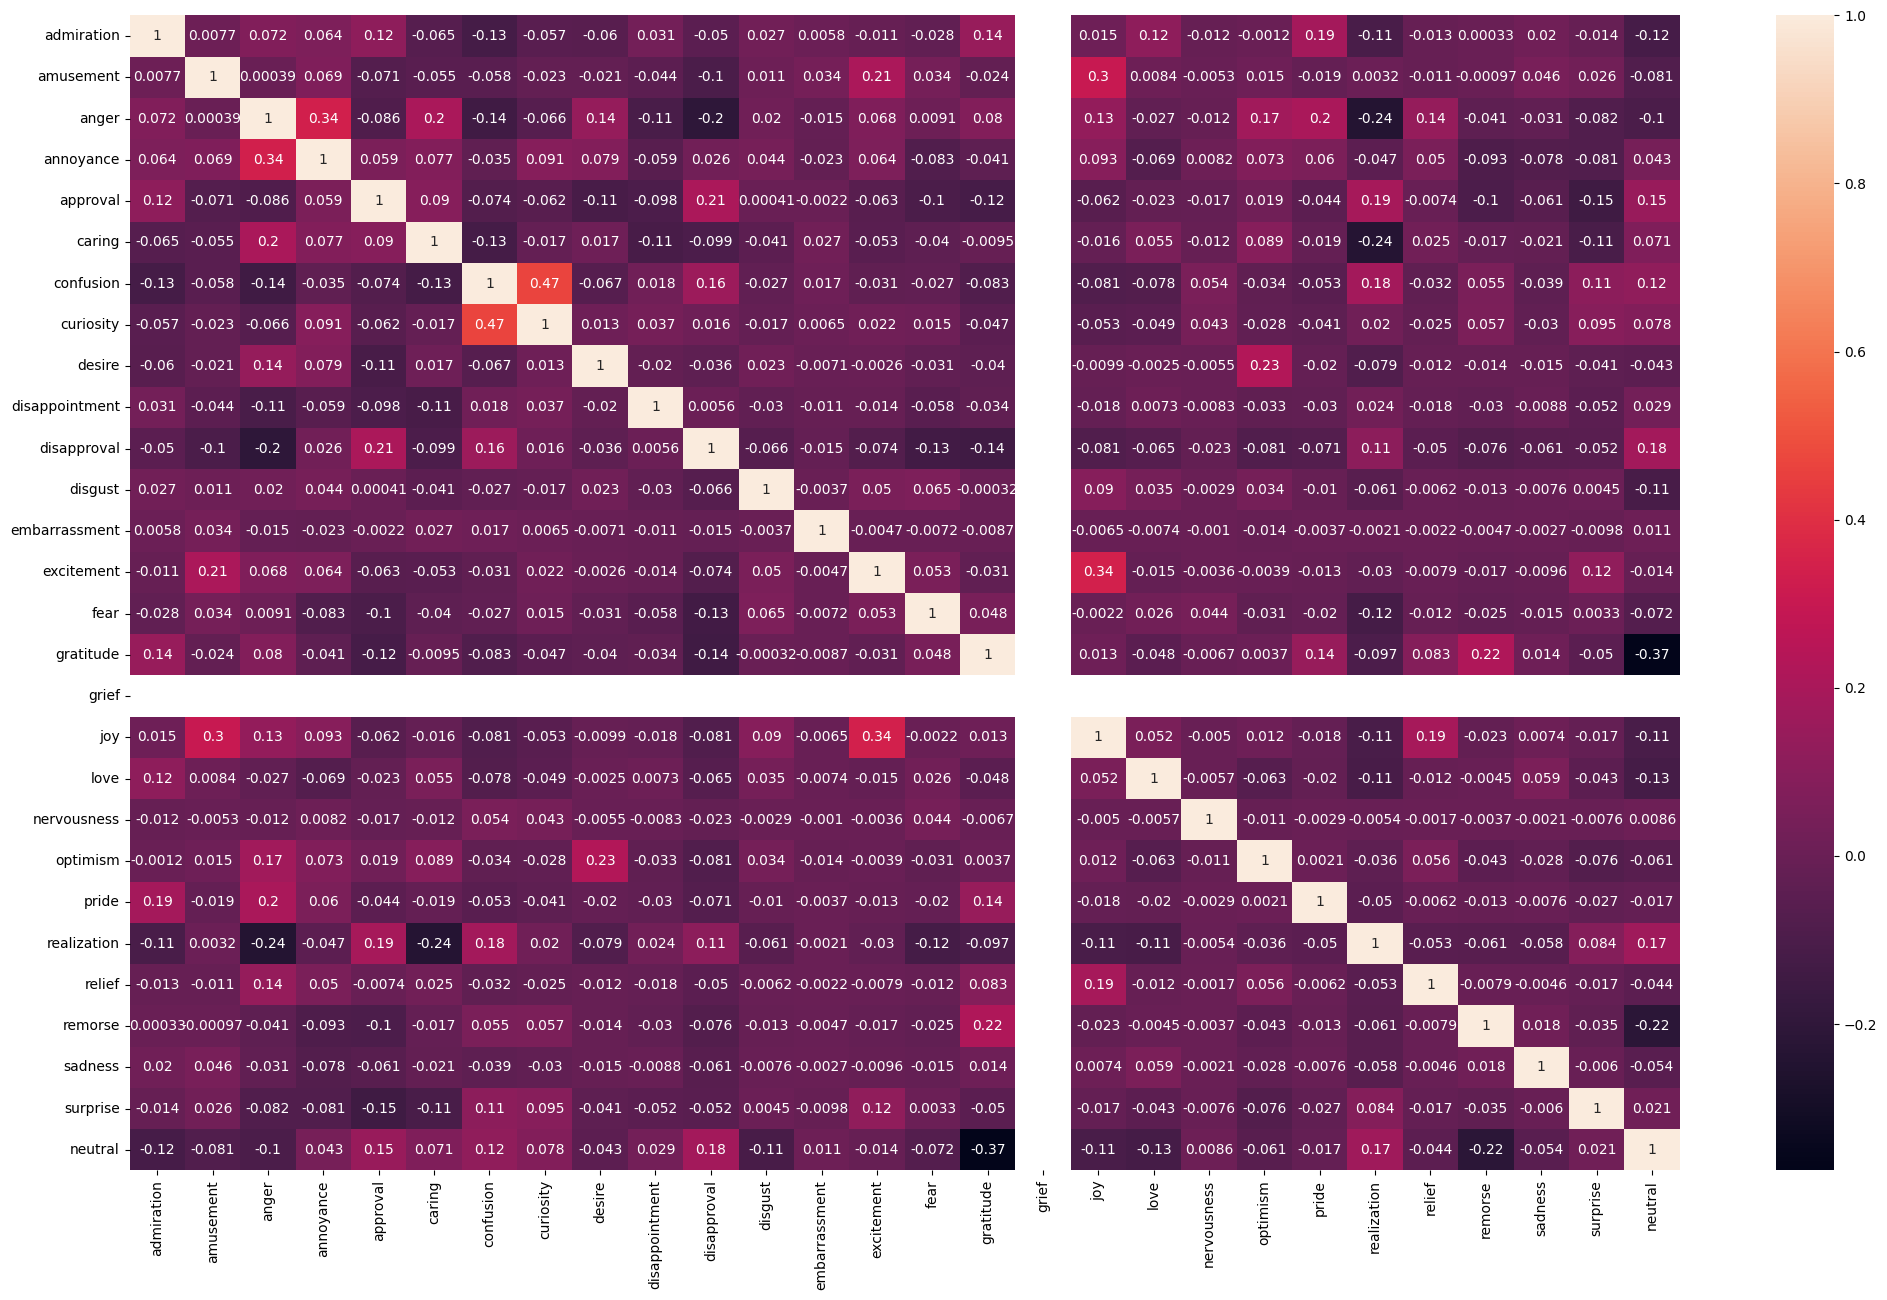

In [557]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(dataset, annot=True)
# plt.title('Feature Correlation Heatmap')
# plt.show()

<AxesSubplot: >

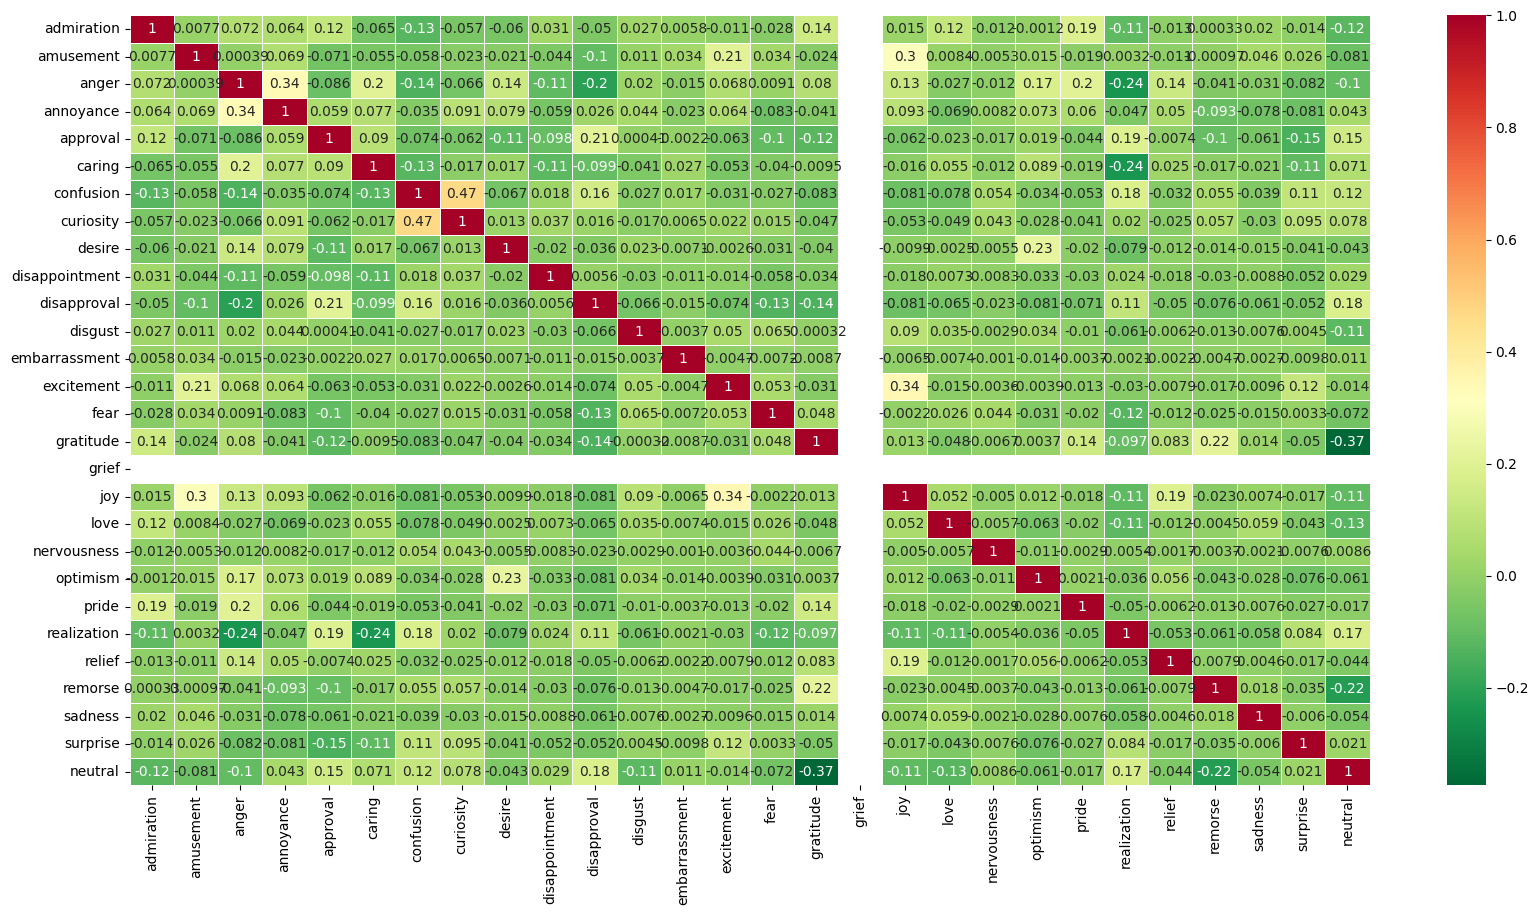

In [558]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20, 10))
# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(dataset, cmap='RdYlGn_r', linewidths=0.5, annot=True)

In [559]:
correlation_trend = df.iloc[:, -8:].corr(method='pearson')

# Visualize the correlation matrix or get correlation values for specific features
# print(correlation_matrix)
dataset1 = pd.DataFrame(data=correlation_trend)

<AxesSubplot: >

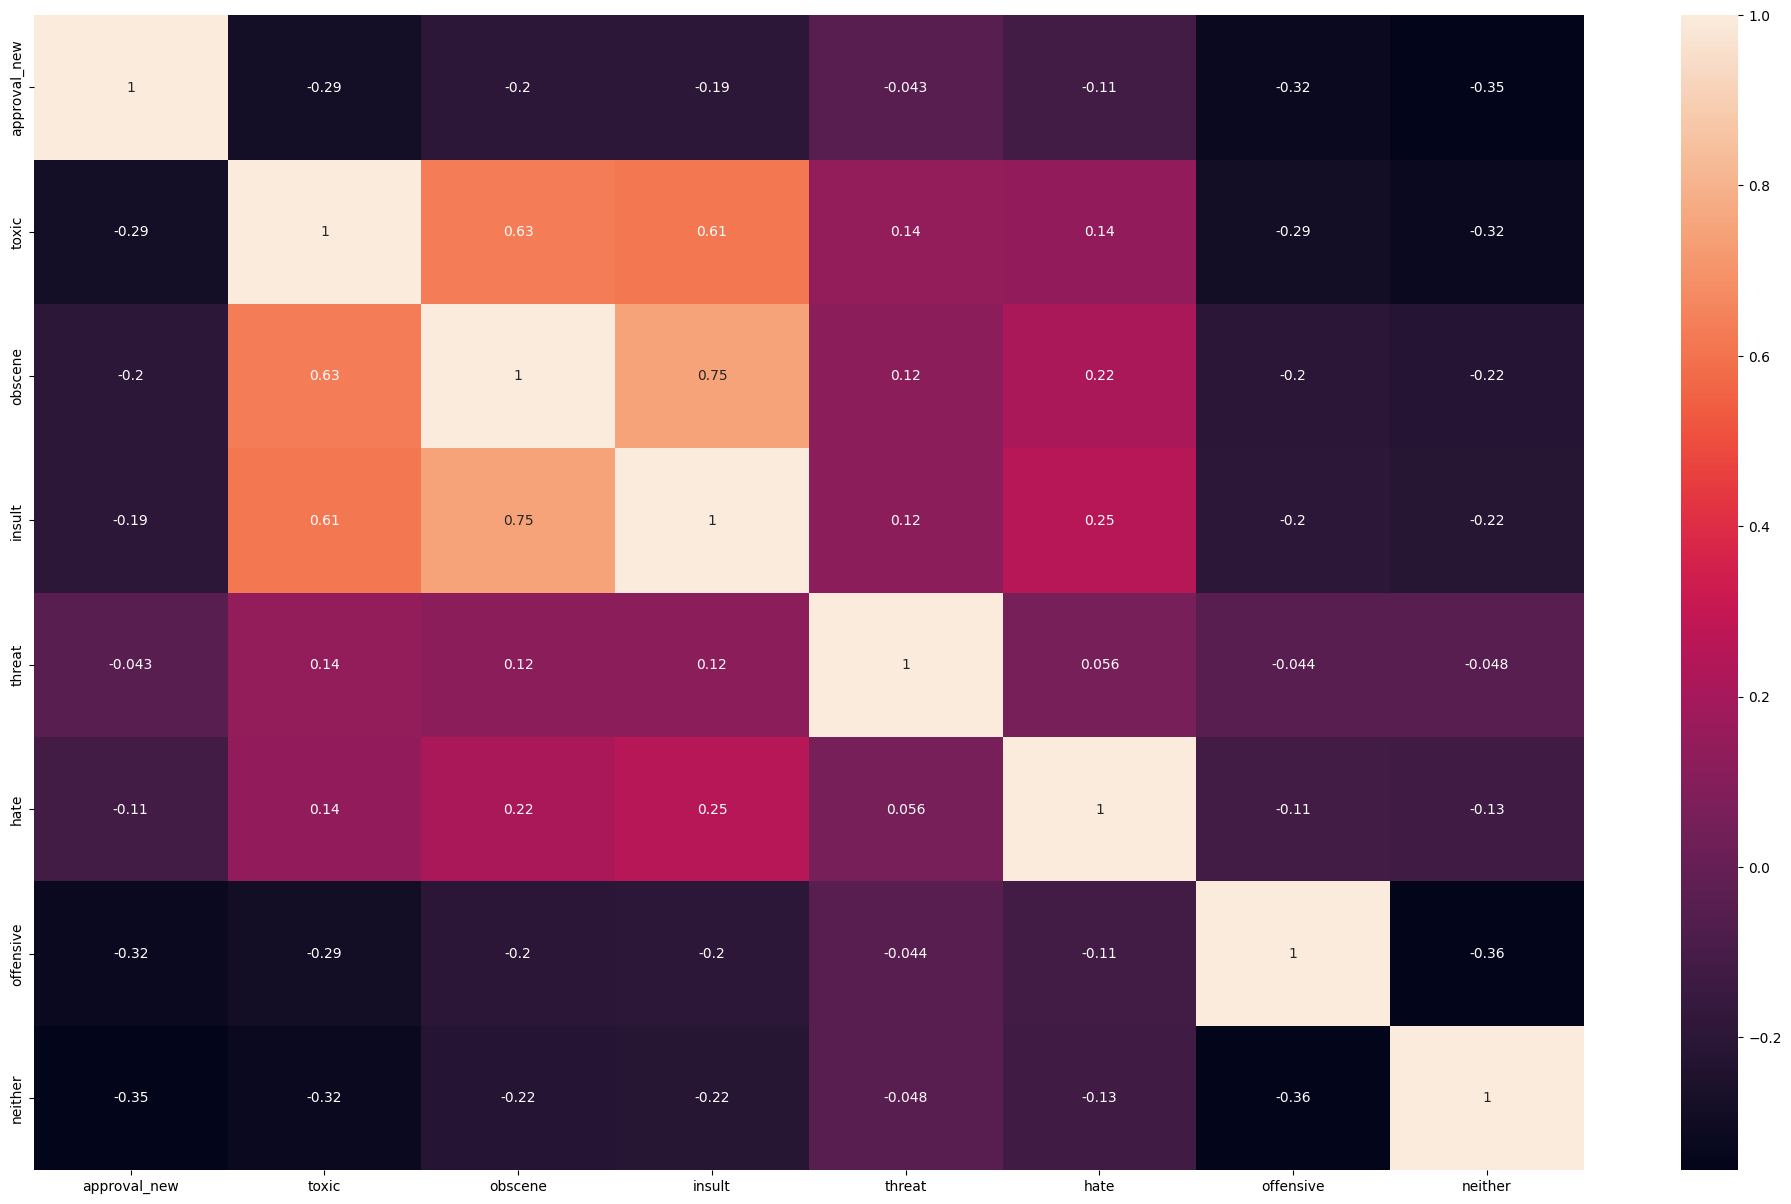

In [560]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(dataset1, annot=True)
# plt.title('Feature Correlation Heatmap')
# plt.show()

In [561]:
correlation_all = df.corr(method='kendall')

# Visualize the correlation matrix or get correlation values for specific features
# print(correlation_matrix)
dataset2 = pd.DataFrame(data=correlation_all)

<AxesSubplot: >

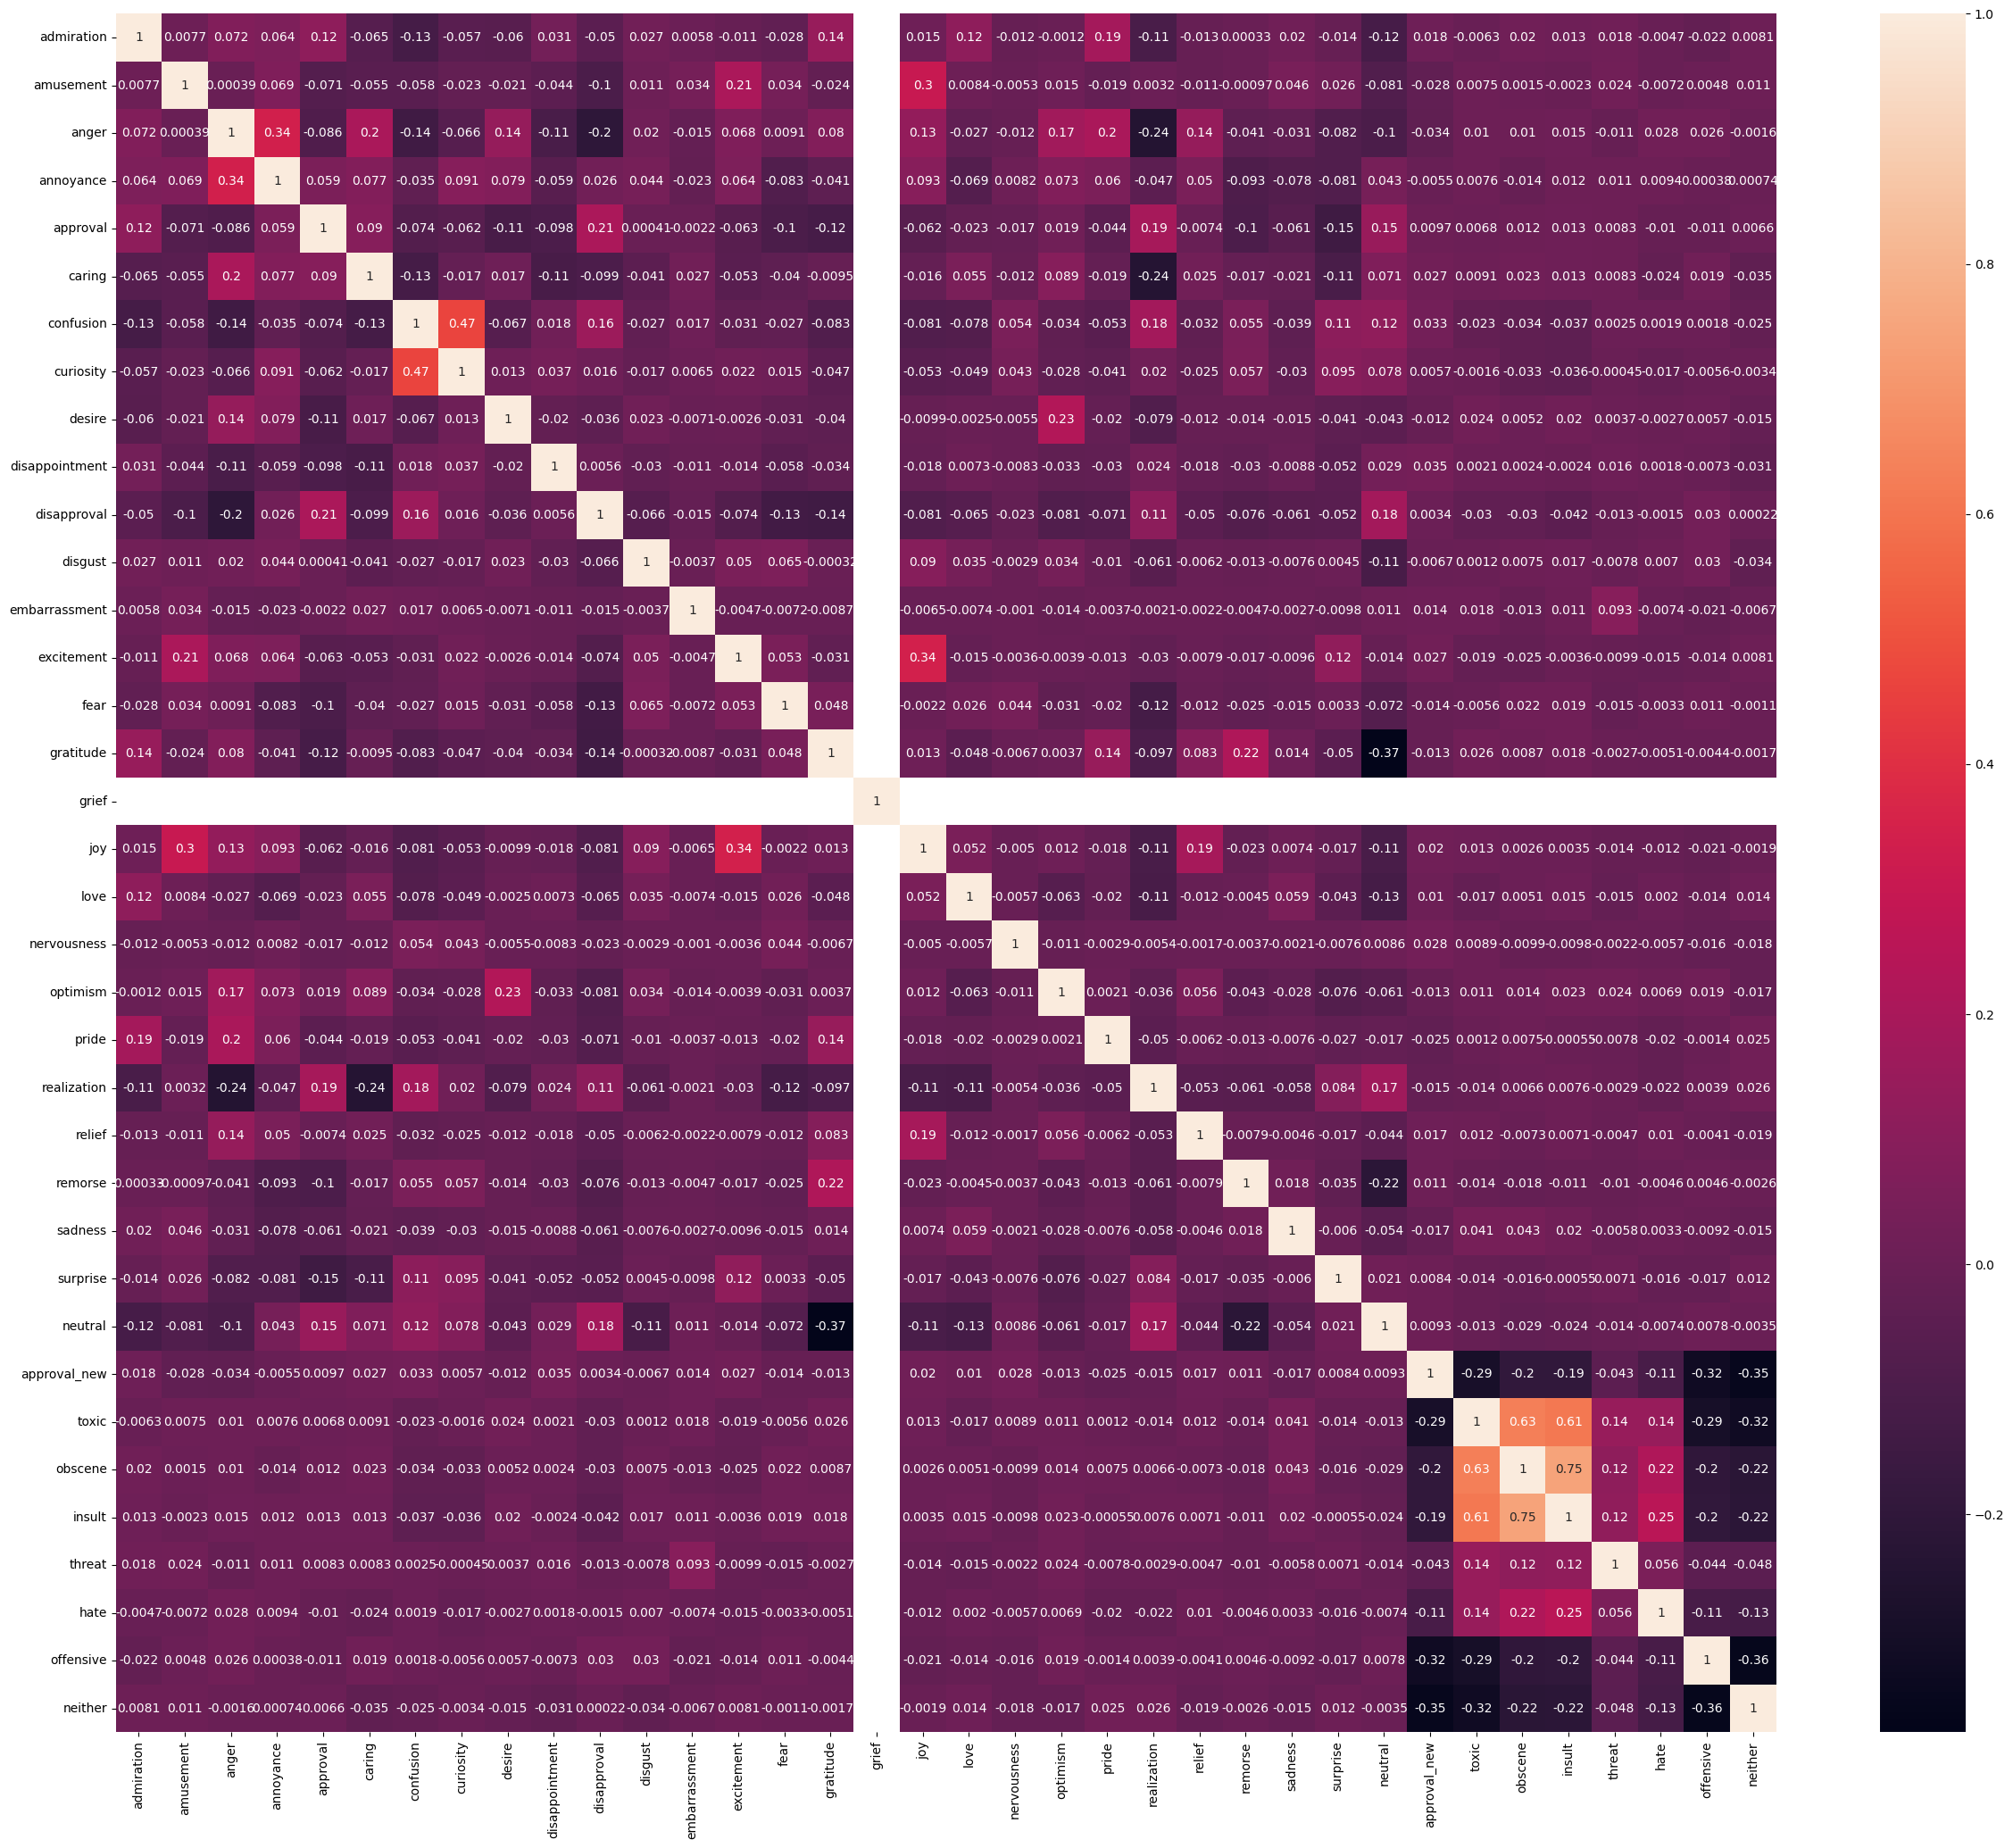

In [562]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(dataset2, annot=True)
# plt.title('Feature Correlation Heatmap')
# plt.show()

In [563]:
# # Assuming 'correlation_matrix' is your calculated correlation matrix
# # Set a correlation threshold
# threshold = 0.2  # Adjust this threshold based on your needs

# # Find pairs of highly correlated features
# highly_correlated = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() <= 1)

# # Create a set to store features to drop
# features_to_drop = set()

# for col in highly_correlated:
#     correlated_features = list(highly_correlated.index[highly_correlated[col]])
#     for correlated_feature in correlated_features:
#         if correlated_feature != col:
#             features_to_drop.add(correlated_feature)

In [564]:
# features_to_drop